In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 160MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
from tensorflow import keras

In [11]:
import tensorflow as tf
from keras import Sequential

In [23]:
from keras.layers import Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Dropout

In [13]:
#generator
train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/train', label_mode='int', batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 20000 files belonging to 2 classes.


In [14]:
validation_df = keras.utils.image_dataset_from_directory(
    directory = '/content/test', label_mode='int', batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 5000 files belonging to 2 classes.


In [15]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [16]:
train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [17]:
# create CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
historty = model.fit(train_df, epochs=10, validation_data=validation_df)

Epoch 1/10
625/625 [==============================] - 53s 75ms/step - loss: 0.6147 - accuracy: 0.6481 - val_loss: 0.5267 - val_accuracy: 0.7364
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5052 - accuracy: 0.7477 - val_loss: 0.4681 - val_accuracy: 0.7760
Epoch 3/10
625/625 [==============================] - 60s 94ms/step - loss: 0.4353 - accuracy: 0.7947 - val_loss: 0.4720 - val_accuracy: 0.7832
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.3767 - accuracy: 0.8300 - val_loss: 0.4740 - val_accuracy: 0.7888
Epoch 5/10
625/625 [==============================] - 47s 75ms/step - loss: 0.3164 - accuracy: 0.8620 - val_loss: 0.4796 - val_accuracy: 0.7968
Epoch 6/10
625/625 [==============================] - 48s 76ms/step - loss: 0.2594 - accuracy: 0.8916 - val_loss: 0.5170 - val_accuracy: 0.7934
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2007 - accuracy: 0.9201 - val_loss: 0.5870 - val_accuracy

In [21]:
import matplotlib.pyplot as plt

**Overfitting**

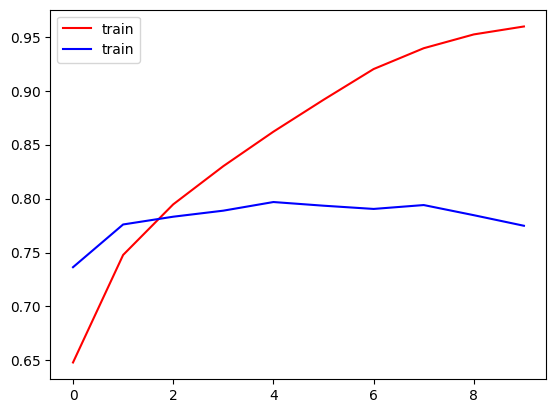

In [22]:
plt.plot(historty.history['accuracy'], color='red', label='train')
plt.plot(historty.history['val_accuracy'], color='blue', label='train')
plt.legend()
plt.show()

**Regularization**

In [24]:
from keras import regularizers

# Create CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01), input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [27]:
history = model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 [==============================] - 73s 106ms/step - loss: 5.4463 - accuracy: 0.5963 - val_loss: 2.2753 - val_accuracy: 0.6362
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 1.8047 - accuracy: 0.6963 - val_loss: 1.4813 - val_accuracy: 0.7014
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 1.3240 - accuracy: 0.7380 - val_loss: 1.3852 - val_accuracy: 0.6976
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 1.1984 - accuracy: 0.7506 - val_loss: 1.8871 - val_accuracy: 0.5076
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 1.0791 - accuracy: 0.7563 - val_loss: 1.1821 - val_accuracy: 0.6246
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 1.0017 - accuracy: 0.7703 - val_loss: 0.9946 - val_accuracy: 0.7698
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.9370 - accuracy: 0.7752 - val_loss: 0.9258 - val_ac

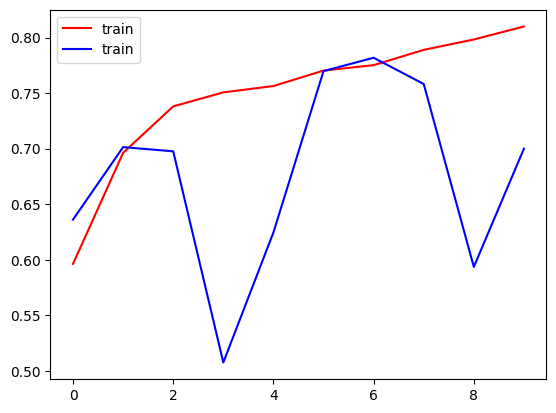

In [29]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='train')
plt.legend()
plt.show()

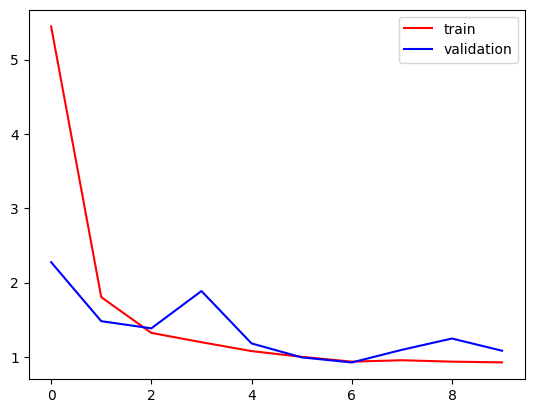

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Above model does not perform very well**

NOW

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
)

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_df = train_datagen.flow_from_directory(
    directory='/content/train', target_size=(256, 256), batch_size=32, class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [35]:
validation_df = test_datagen.flow_from_directory(
    directory='/content/test', target_size=(256, 256), batch_size=32, class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [36]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01), input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping and Learning Rate Reduction Callbacks

In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_df,
    validation_data=validation_df,
    steps_per_epoch=train_df.n // train_df.batch_size,
    validation_steps=validation_df.n // validation_df.batch_size,
    callbacks=[early_stopping, reduce_lr]
)


625/625 [==============================] - 336s 537ms/step - loss: 2.6141 - accuracy: 0.5133 - val_loss: 2.4190 - val_accuracy: 0.5248 - lr: 0.0010


Pretrained Model

#VGG16

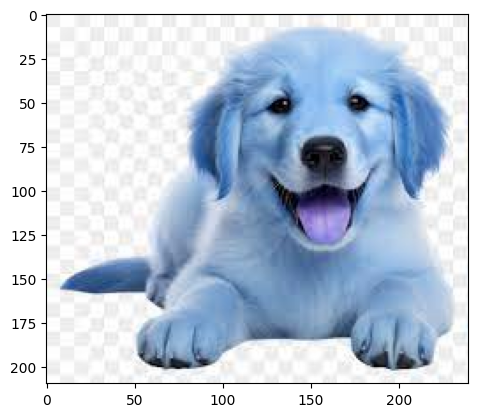

In [44]:
import cv2
test_img = cv2.imread('/content/download.jpeg')
plt.imshow(test_img)

In [45]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)

In [46]:
model.predict(test_input)

1/1 [==============================] - 1s 534ms/step


array([[0.]], dtype=float32)

In [42]:
from keras.applications.imagenet_utils import decode_predictions

In [43]:
from keras.applications import VGG16

In [48]:
test_img=cv2.resize(test_img,(224,224))
test_input=test_img.reshape(1,224,224,3)
model = VGG16(weights='imagenet', include_top=True)

features = model.predict(test_input)
decode_predictions(features, top=5)

35363/35363 [==============================] - 0s 0us/step


[[('n02099601', 'golden_retriever', 0.8648744),
  ('n02099712', 'Labrador_retriever', 0.13074148),
  ('n02111500', 'Great_Pyrenees', 0.0021738636),
  ('n02109525', 'Saint_Bernard', 0.00036892874),
  ('n02102480', 'Sussex_spaniel', 0.00029339403)]]

In [54]:
from keras import layers, models, optimizers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model2 = Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

conv_base.trainable = False

callback=EarlyStopping(
monitor="val_loss",
min_delta=0.00001,
patience=8,
verbose=1,
mode="auto",
baseline=None,
  restore_best_weights=False)
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

In [ ]:
history=model2.fit(train_df,epochs=100,callbacks=callback,validation_data=validation_df)

Epoch 1/100
625/625 [==============================] - 378s 592ms/step - loss: 0.3509 - accuracy: 0.8417 - val_loss: 0.2209 - val_accuracy: 0.8980
Epoch 2/100
625/625 [==============================] - 388s 621ms/step - loss: 0.2536 - accuracy: 0.8899 - val_loss: 0.1597 - val_accuracy: 0.9340
Epoch 3/100
625/625 [==============================] - 371s 594ms/step - loss: 0.2338 - accuracy: 0.9012 - val_loss: 0.1557 - val_accuracy: 0.9408
Epoch 4/100
625/625 [==============================] - 370s 591ms/step - loss: 0.2241 - accuracy: 0.9029 - val_loss: 0.1497 - val_accuracy: 0.9396
Epoch 5/100
625/625 [==============================] - 367s 587ms/step - loss: 0.2158 - accuracy: 0.9093 - val_loss: 0.1449 - val_accuracy: 0.9420
Epoch 6/100
625/625 [==============================] - 367s 587ms/step - loss: 0.2110 - accuracy: 0.9118 - val_loss: 0.1937 - val_accuracy: 0.9236
Epoch 7/100
625/625 [==============================] - 368s 589ms/step - loss: 0.2051 - accuracy: 0.9112 - val_loss: 0

In [ ]:
plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()

plt.show()

#2

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])


In [ ]:
history=model3.fit(train_ds,epochs=100,callbacks=callback,validation_data=validation_ds)

In [ ]:
plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()

plt.show()